# Split the dataset into development and final test set

In [63]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.utils

In [64]:
do_save = False

In [65]:
data_dir = '../../data'
data_name = 'SonyAIBORobotSurface1_IoC'
data_filename = data_dir+'/'+data_name+'/'+data_name+'_ALL.txt'
robot_data = np.loadtxt(Path(data_filename))
print('The shape of robot_data is', robot_data.shape)

The shape of robot_data is (621, 71)


Number of samples of class 1 349
Number of samples of class 2 272


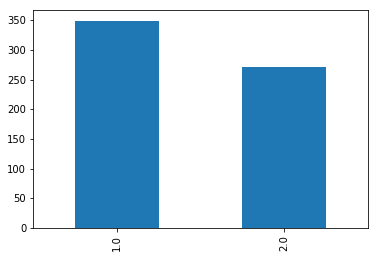

In [66]:
y_data = robot_data[:,0]
print('Number of samples of class 1', (y_data == 1.0).sum())
print('Number of samples of class 2', (y_data == 2.0).sum())
y_df = pd.DataFrame(robot_data[:,0])
y_df[0].value_counts().plot(kind='bar')

In [67]:
robot_data = sklearn.utils.shuffle(robot_data)

# Create a balanced dataset

Selection set sizes: 349 272
Min selection set size: 272


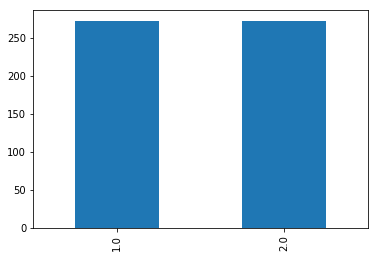

In [68]:
robot_df = pd.DataFrame(robot_data)
class1_df = robot_df[(robot_df[0]==1)]
class2_df = robot_df[(robot_df[0]==2)]
n1 = class1_df.count()[0]
n2 = class2_df.count()[0]
n = min(n1, n2)
print('Selection set sizes:', n1, n2)
print('Min selection set size:', n)
class1_df = class1_df.iloc[:n]
class2_df = class2_df.iloc[:n]
balanced_df = pd.concat([class1_df, class2_df])
balanced_df = sklearn.utils.shuffle(balanced_df)
balanced_df[0].value_counts().plot(kind='bar')

# Save the balanced dataset

In [69]:
data_filename = data_name+'_BALANCED.txt'
if do_save:   
    np.savetxt(data_filename, balanced_df.to_numpy(), fmt='%8e', delimiter='\t')

# Reload and check the balanced dataset

The shape of balanced_data is (544, 71)
Number of samples of class 1 272
Number of samples of class 2 272


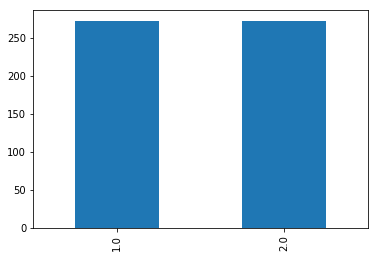

In [70]:
balanced_data = np.loadtxt(Path(data_filename))
print('The shape of balanced_data is', balanced_data.shape)
y_data = balanced_data[:,0]
print('Number of samples of class 1', (y_data == 1.0).sum())
print('Number of samples of class 2', (y_data == 2.0).sum())
y_df = pd.DataFrame(y_data)
y_df[0].value_counts().plot(kind='bar')

# Split the data

In [71]:
train_data, test_data = train_test_split(balanced_data, test_size=100, random_state=21, stratify=balanced_data[:,0])
print('The shape of train_data is', train_data.shape)
print('The shape of test_data is', test_data.shape)
print('Training data:')
print('Number of samples of class 1', (train_data[:,0] == 1.0).sum())
print('Number of samples of class 2', (train_data[:,0] == 2.0).sum())
print('Test data:')
print('Number of samples of class 1', (test_data[:,0] == 1.0).sum())
print('Number of samples of class 2', (test_data[:,0] == 2.0).sum())

The shape of train_data is (444, 71)
The shape of test_data is (100, 71)
Training data:
Number of samples of class 1 222
Number of samples of class 2 222
Test data:
Number of samples of class 1 50
Number of samples of class 2 50


# Save the development and final test datasets

In [72]:
if do_save:
    data_filename = data_name+'_DEV.txt'
    np.savetxt(data_filename, train_data, fmt='%8e', delimiter='\t')
    data_filename = data_name+'_FINAL_TEST.txt'
    np.savetxt(data_filename, test_data, fmt='%8e', delimiter='\t')